In [39]:
import pandas as pd
import cv2
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv("100_leaves_plant_species/data_Mar_64.txt")

In [6]:
species = data.values[:, 0]

In [7]:
species

array(['Acer Campestre', 'Acer Campestre', 'Acer Campestre', ...,
       'Zelkova Serrata', 'Zelkova Serrata', 'Zelkova Serrata'],
      dtype=object)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.76it/s]
C:\Users\vanta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vanta\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1600, 3)
Mean of height and weigh:  472.829375 563.689375


<AxesSubplot:ylabel='Density'>

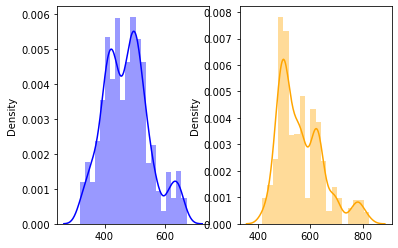

In [21]:
dir_imgs = "100_leaves_plant_species/data/"
imgs_shape = []
y = []
for i in tqdm(range(100)):
    tmp = species[i].split()
    tmp = tmp[0] + '_' + tmp[1]
    for j in range(1, 17):
        tmp1 = str(j)
        if len(tmp1) == 1:
            tmp1 = '0' + tmp1
        dir_img = dir_imgs + tmp + '/' + tmp + '_' + tmp1 + '.ab.jpg'
        img = cv2.imread(dir_img)
        imgs_shape.append(img.shape)
        
imgs_shape = np.asarray(imgs_shape)
print(imgs_shape[:].shape)
print('Mean of height and weigh: ', np.mean(imgs_shape[:, 0]),np.mean(imgs_shape[:, 1]))

plt.subplot(1, 2, 1)
sns.distplot(imgs_shape[:, 0], color = 'blue')

plt.subplot(1, 2, 2)
sns.distplot(imgs_shape[:, 1], color = 'orange')

In [49]:
dir_imgs = "100_leaves_plant_species/data/"
imgs = []
y = []
for i in tqdm(range(100)):
    tmp = species[i].split()
    tmp = tmp[0] + '_' + tmp[1]
    for j in range(1, 17):
        tmp1 = str(j)
        if len(tmp1) == 1:
            tmp1 = '0' + tmp1
        dir_img = dir_imgs + tmp + '/' + tmp + '_' + tmp1 + '.ab.jpg'
        img = cv2.imread(dir_img, cv2.IMREAD_GRAYSCALE)
        _, img = cv2.threshold(img, 128, maxval=255, type=cv2.THRESH_BINARY)
        img = cv2.resize(img, (200, 200))
        imgs.append(img)
        y.append(i)

imgs, y = np.asarray(imgs).reshape(1600, 200, 200,1), np.asarray(y)
print('Shape of images after resize, Shape of label', imgs.shape, y.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 65.65it/s]


Shape of images after resize, Shape of label (1600, 200, 200, 1) (1600,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(imgs, y, train_size = 0.8)

In [52]:
X_train_extract = []
for i in tqdm(X_train):
    tmp = i.reshape(200 * 200)#PCA(n_components= 300).fit_transform(i.reshape(1, 480 * 560))
    X_train_extract.append(tmp)
X_train_extract = np.asarray(X_train_extract)
print('Shape of images extract by hog', X_train_extract.shape)

100%|██████████████████████████████████████████████████████████████████████████| 1280/1280 [00:00<00:00, 247965.87it/s]

Shape of images extract by hog (1280, 40000)


<AxesSubplot:>

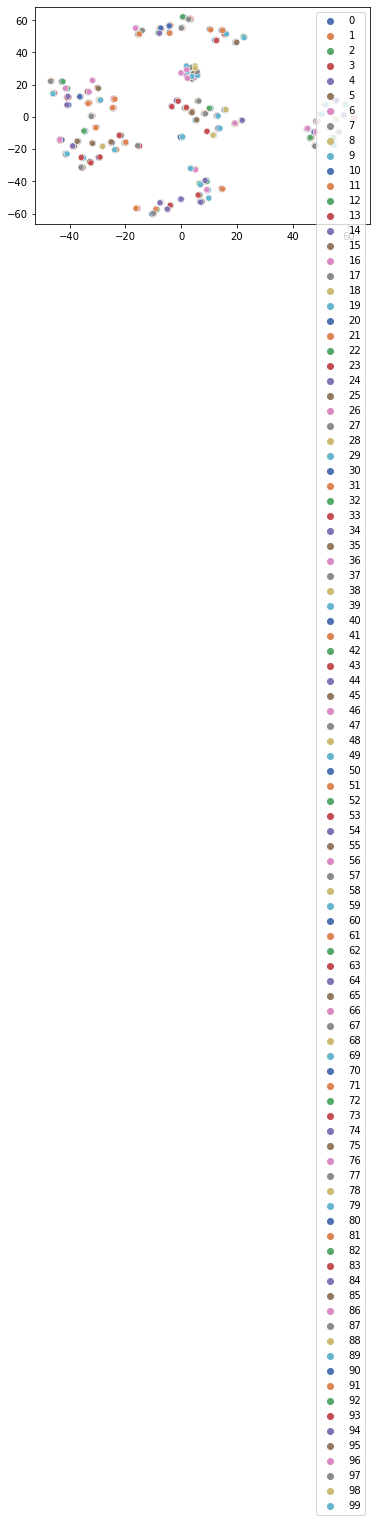

In [45]:
X_embedded = TSNE(n_components= 2).fit_transform(X_train_extract)
sns.scatterplot(x = X_embedded[:, 0], y = X_embedded[:, 1], hue = y_train, palette= 'deep')

In [53]:
model = BernoulliNB()
model.fit(X_train_extract, y_train)

BernoulliNB()

In [54]:
X_test_extract = []
for i in tqdm(X_test):
    tmp = i.reshape(200 * 200)#hog(i, pixels_per_cell= (40, 40), cells_per_block=(1, 1), multichannel= True)
    X_test_extract.append(tmp)
X_test_extract = np.asarray(X_test_extract)
print('Shape of images extract by hog', X_test_extract.shape)

100%|████████████████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<?, ?it/s]

Shape of images extract by hog (320, 40000)


In [55]:
y_pred = model.predict(X_test_extract)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           1       0.00      0.00      0.00       4.0
           2       0.00      0.00      0.00       3.0
           3       0.00      0.00      0.00       2.0
           4       0.00      0.00      0.00       4.0
           5       0.00      0.00      0.00       4.0
           6       0.00      0.00      0.00       3.0
           7       0.00      0.00      0.00       3.0
           8       0.00      0.00      0.00       2.0
           9       0.00      0.00      0.00       2.0
          10       0.00      0.00      0.00       6.0
          11       0.00      0.00      0.00       5.0
          12       0.00      0.00      0.00       3.0
          13       0.00      0.00      0.00       4.0
          14       0.00      0.00      0.00       2.0
          15       0.00      0.00      0.00       3.0
          16       0.00      0.00      0.00       4.0
          17       0.00    

C:\Users\vanta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vanta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: Image data of dtype object cannot be converted to float

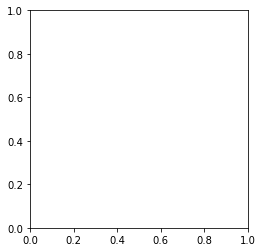

In [70]:
data = pd.read_csv('100_leaves_plant_species/data_Sha_64.txt').values
sample = data[100, 1:].reshape(8, 8, 1)
plt.imshow(sample * 225)
plt.show()